# 사이버 폭력 예방 관련 데이터 분석

**2021년 기준, 청소년의 나이는 만 9(2012)~24(1997)세**

- 사회적 활동이 적은 청소년 → 사이버 폭력 연관성
- 스마트폰/인터넷 중독 → 사이버 폭력 연관성

### 라이브러리 불러오기

In [1]:
# 라이브러리 로딩
import pandas as pd
import numpy as np

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

# 통계 패키지
import scipy.stats as spst

In [2]:
# 이변량 분석: 범주형 X -> 범주형 Y
def eda2_cc(data, feature, target):

    # 교차표 (먼저 집계)
    table = pd.crosstab(data[target], data[feature])
    print('교차표\n')
    display(table)
    display(pd.crosstab(data[target], data[feature], normalize = 'columns'))
    print('-' * 100)

    # 수치화: 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    print('기대빈도\n',result[3])
    
    # 시각화: mosaic plot
    mosaic(data, [feature,target])
    plt.axhline(1- data[target].mean(), color = 'r')
    plt.show()
    
    # 번외: 100% Stacked Bar
    # x의 비율은 신경 쓰지 않고 y의 비율을 신경 씀!
    temp = pd.crosstab(data[feature], data[target], normalize = 'index')
    display(temp)
    temp.plot.bar(stacked=True)
    plt.axhline(1-data[target].mean(), color = 'r')
    plt.xticks(rotation=0)
    plt.show()

### 데이터 불러오기

In [3]:
data_path = './data/'

In [4]:
# usecols = []

v_adol = pd.read_csv(data_path + '2021_사이버폭력_학생.csv', encoding='cp949',
#                      usecols=[]
                    )

v_adol.head()

C:\Users\User\anaconda3\envs\ai_env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (95) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,idx,학교,시도,행정구,행정구역분류,학교급,고등학교유형,학교세부유형,남녀공학구분,지역규모,...,A_5,A_6,A_7,A_8,A_7_etc,B_1,B_2,C,D,WT
0,1,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,5,5,5,4,558.306878
1,2,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,NaN,NaN,NaN,NaN,NaN,5,5,4,5,635.757962
2,3,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,4,4,6,5,635.757962
3,4,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,5,5,5,4,635.757962
4,5,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,4,5,4,4,558.306878


In [5]:
v_adult = pd.read_csv(data_path + '2021_사이버폭력_성인.csv', encoding='cp949',
#                      usecols=[]
                    )

v_adult.head()

C:\Users\User\anaconda3\envs\ai_env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (82,105,172,203) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,AREA,SCALE,AREACODE,CID,GID,AREA1,AREA2,AREA3,AREA4,...,DQ1_ETC,DQ2_1,DQ2_2,DQ3,DQ4,DQ5,DQ5_1,DQ5_1_ETC,END,WT
0,2,32,2,32030340191,33,31,강원도,강릉시,강동면,526-1번지,...,NaN,3,1.0,2,4,2,NaN,NaN,NaN,9011.071429
1,6,32,2,32030340191,33,35,강원도,강릉시,강동면,526-1번지,...,NaN,4,1.0,4,2,2,NaN,NaN,NaN,9011.071429
2,8,32,2,32030340191,33,37,강원도,강릉시,강동면,526-1번지,...,NaN,3,1.0,2,3,2,NaN,NaN,NaN,2124.459459
3,14,32,2,32030340191,38,43,강원도,강릉시,강동면,512번지,...,NaN,4,1.0,2,5,2,NaN,NaN,NaN,2046.000000
4,23,32,2,32030340191,47,52,강원도,강릉시,강동면,486번지,...,NaN,4,1.0,2,5,2,NaN,NaN,NaN,2046.000000


### 먼저, 성인 데이터에서 성인 청소년 데이터만 가져오기

In [6]:
v_adult.loc[v_adult['AGE'] <= 24, 'AGE'].value_counts()

23    81
22    76
24    70
21    65
20    47
Name: AGE, dtype: int64

In [7]:
v_adult = v_adult.loc[v_adult['AGE'] <= 24, :]
v_adult.loc[:, 'AGE'].value_counts()

23    81
22    76
24    70
21    65
20    47
Name: AGE, dtype: int64

### 학생

- **기본 사항**
<br><br>
    - Q1 (최근 1년간 하루 평균 인터넷 이용 시간)
        - 1.0: 1시간 미만, 2.0: 1시간 이상 ~ 2시간 미만, 3.0: 2시간 이상 ~ 3시간 미만, 4.0: 3시간 이상 ~ 4시간 미만, 5.0: 4시간 이상 ~ 5시간 미만, 6.0: 5시간 이상
<br><br>
    - Q15 (최근 1년간 사이버 폭력 예방 및 대응 관련 교육을 들은 적 있는지)
        - 1: 있다, 2: 없다
<br><br>

- **사회적 활동 관련 칼럼**
<br><br>
    - Q11_1 ~ Q11_3 (친구와의 관계)
        - 1.0: 전혀 그렇지 않다, 2.0: 그렇지 않다, 3.0: 그렇다, 4.0: 매우 그렇다
        - 1: 내 친구들은 나와 이야기를 나눌 때 서로 생각이 달라도 존중해 준다
        - 2: 내 친구들은 내가 말하는 것에 관심을 갖고 들어 준다
        - 3: 나는 친구들에게 내 고민과 문제를 솔직하게 털어놓는다
<br><br>
    - Q12_1 ~ Q12_3 (부모님과의 관계)
        - 1.0: 전혀 그렇지 않다, 2.0: 그렇지 않다, 3.0: 그렇다, 4.0: 매우 그렇다
        - 1: 내 일은 나 스스로 결정할 수 있게 격려해 주신다
        - 2: 내가 학교생활을 어떻게 하는지 관심 있게 물어보신다
        - 3: 사소한 것도 여쭤보면 잘 듣고 응답해 주신다
<br><br>
- **사이버 폭력 관련 칼럼**
<br><br>
    - Q9a_1 ~ Q9a_8 (다음과 같은 괴롭힘 행동을 한 적이 있는가?)
        - 1.0: 1년에 한 두번, 2.0: 6개월에 한 두번, 3.0: 한 달에 한 두번, 4.0: 일주일에 한 두번, 5.0: 거의 매일, 9.0: 전혀 없음
<br><br>
    - Q9_1 (괴롭힌 사람이 누구인가?)
        - 1.0: 아는 사람
        - 2.0: 전혀 모르는 사람
<br><br>
    - Q9_2 (누구와 함께 괴롭혔는가?)
        - 1.0: 혼자, 2.0: 둘, 3.0: 셋, 4.0: 넷 이상
<br><br>
    - Q9_3_1 ~ Q9_3_7, Q9_3_7_etc (어떤 매체를 통해 괴롭혔는가?)
        - 1.0: 문자 및 인스턴트 메시지(카카오톡, 라인, 페이스북 메신저 등)
        - 2.0: 커뮤니티·동호회 (네이버·다음 카페, 클럽 등)
        - 3.0: SNS (페이스북, 인스타그램, 블로그, 틱톡 등)
        - 4.0: 개인 홈페이지
        - 5.0: 이메일
        - 6.0: 온라인 게임
        - 7.0: 기타
<br><br>
    - Q9_4_1 ~ Q9_4_6 (괴롭히는 행동을 한 이유는?)
        - 1.0: 재미나 장난으로, 스트레스 해소를 위해
        2.0: 주변에서 함께 하므로, 친구들과 어울리기 위해
        3.0: 상대방이 먼저 그런 행동을 해서, 보복하기 위해
        4.0: 상대방이 싫어서, 상대방에게 화가 나서
        5.0: 내 의견과 달라서, 상대방이 틀린 말을 해서
        6.0: 그냥 특별한 이유 없이
<br><br>
    - Q9_6_1 ~ Q9_6_5 (괴롭히고 나서 어떤 생각이 들었는가?)
        - 1.0: 전혀 그렇지 않다, 2.0: 그렇지 않다, 3.0: 그렇다, 4.0: 매우 그렇다
        - 1: 정당한 행동이라 생각했다
        - 2: 상대방에게 미안하고 후회스러웠다
        - 3: 문제가 생길까봐 걱정되었다
        - 4: 흥미롭고 재미있었다
        - 5: 아무런 느낌이 없었다
<br><br>
    - Q10_1 ~ Q10_12 (다음을 대상으로 조롱/비난 행동을 한 적이 있는가?)
        - 1.0: 1년에 한 두번, 2.0: 6개월에 한 두번, 3.0: 한 달에 한 두번, 4.0: 일주일에 한 두번, 5.0: 거의 매일, 9.0: 전혀 없음

In [8]:
select_cols = ['Q1', 'Q15',     # 기본 정보 칼럼
               'Q9a_1', 'Q9a_2', 'Q9a_3', 'Q9a_4', 'Q9a_5', 'Q9a_6', 'Q9a_7', 'Q9a_8',    # 괴롭힘 여부
               'Q9_1', 'Q9_2', 
               'Q9_3_1', 'Q9_3_2', 'Q9_3_3', 'Q9_3_4', 'Q9_3_5', 'Q9_3_6', 'Q9_3_7', 'Q9_3_7_etc', # 괴롭힘 매체
               'Q9_4_1', 'Q9_4_2', 'Q9_4_3', 'Q9_4_4', 'Q9_4_5', 'Q9_4_6',  # 괴롭힘 행동 이유
               'Q9_6_1', 'Q9_6_2', 'Q9_6_3', 'Q9_6_4', 'Q9_6_5',  # 괴롭힘 이후 생각
               'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8',  # 조롱/비난 행동 여부
               'Q10_9', 'Q10_10', 'Q10_11', 'Q10_12', 
               'Q11_1', 'Q11_2', 'Q11_3', 'Q12_1', 'Q12_2', 'Q12_3',    # 사회적 활동 관련 칼럼
               ]

v_adol_s = v_adol.loc[:, select_cols]
v_adol_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Q1          9017 non-null   int64  
 1   Q15         9017 non-null   int64  
 2   Q9a_1       9017 non-null   int64  
 3   Q9a_2       9017 non-null   int64  
 4   Q9a_3       9017 non-null   int64  
 5   Q9a_4       9017 non-null   int64  
 6   Q9a_5       9017 non-null   int64  
 7   Q9a_6       9017 non-null   int64  
 8   Q9a_7       9017 non-null   int64  
 9   Q9a_8       9017 non-null   int64  
 10  Q9_1        1236 non-null   float64
 11  Q9_2        1236 non-null   float64
 12  Q9_3_1      639 non-null    float64
 13  Q9_3_2      118 non-null    float64
 14  Q9_3_3      381 non-null    float64
 15  Q9_3_4      53 non-null     float64
 16  Q9_3_5      34 non-null     float64
 17  Q9_3_6      278 non-null    float64
 18  Q9_3_7      24 non-null     float64
 19  Q9_3_7_etc  23 non-null    

In [9]:
# 괴롭힘/조롱/비난 행동을 주기적으로(한 달에 1번 이상) 하는 사람
v_adol_s['V_O'] = False
v_cols = ['Q9a_1', 'Q9a_2', 'Q9a_3', 'Q9a_4', 'Q9a_5', 'Q9a_6', 'Q9a_7', 'Q9a_8',    # 사이버 폭력 관련 칼럼
          'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10', 'Q10_11', 'Q10_12'
         ]

# 해당 행의 V_0을 True로 변경
for c in v_cols:
    v_adol_s.loc[v_adol_s[c].isin([3, 4, 5]), 'V_O'] = True

# 관련 칼럼 지우기
v_adol_s.drop(v_cols, axis=1, inplace=True)




# 친구/부모님과의 관계가 그렇다, 매우 그렇다

v_adol_s['S_O'] = 'Negative'
s_cols = ['Q11_1', 'Q11_2', 'Q11_3', 'Q12_1', 'Q12_2', 'Q12_3'
         ]

# 해당 행의 V_0을 True로 변경
for c in s_cols:
    v_adol_s.loc[v_adol_s[c].isin([3, 4]), 'S_O'] = 'Positive'

# 관련 칼럼 지우기
v_adol_s.drop(s_cols, axis=1, inplace=True)

In [10]:
v_adol_s['V_O'].value_counts()

False    7697
True     1320
Name: V_O, dtype: int64

In [11]:
v_adol_s['S_O'].value_counts()

Positive    8932
Negative      85
Name: S_O, dtype: int64

In [12]:
# 매체 합치기
v_adol_s['sort'] = np.nan
sort_cols = ['Q9_3_1', 'Q9_3_2', 'Q9_3_3', # 괴롭힘 매체
             'Q9_3_4', 'Q9_3_5', 'Q9_3_6', 'Q9_3_7', 'Q9_3_7_etc', ]
for i, c in enumerate(sort_cols):
    v_adol_s.loc[v_adol_s[c].notnull(), 'sort'] = i + 1
v_adol_s.drop(sort_cols, axis=1, inplace=True)
    
# 괴롭힘 이유 합치기
v_adol_s['why'] = np.nan
why_cols = ['Q9_4_1', 'Q9_4_2', 'Q9_4_3', 'Q9_4_4', 'Q9_4_5', 'Q9_4_6',]  # 괴롭힘 행동 이유
for i, c in enumerate(why_cols):
    v_adol_s.loc[v_adol_s[c].notnull(), 'why'] = i + 1
v_adol_s.drop(why_cols, axis=1, inplace=True)

# # 괴롭힘 이후 생각 합치기
# v_adol_s['after'] = np.nan
# after_cols = ['Q9_6_1', 'Q9_6_2', 'Q9_6_3', 'Q9_6_4', 'Q9_6_5']  # 괴롭힘 이후 생각
# for i, c in enumerate(after_cols):
#     v_adol_s.loc[v_adol_s[c].isin([3, 4]) & v_adol_s[], 'after'] = i + 1
# v_adol_s.drop(after_cols, axis=1, inplace=True)

In [13]:
v_adol_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      9017 non-null   int64  
 1   Q15     9017 non-null   int64  
 2   Q9_1    1236 non-null   float64
 3   Q9_2    1236 non-null   float64
 4   Q9_6_1  1236 non-null   float64
 5   Q9_6_2  1236 non-null   float64
 6   Q9_6_3  1236 non-null   float64
 7   Q9_6_4  1236 non-null   float64
 8   Q9_6_5  1236 non-null   float64
 9   V_O     9017 non-null   bool   
 10  S_O     9017 non-null   object 
 11  sort    1236 non-null   float64
 12  why     1236 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 854.3+ KB


### 성인

- **기본 사항**
<br><br>
    - Q1 (최근 1년간 하루 평균 인터넷 이용 시간)
        - 1.0: 1시간 미만, 2.0: 1시간 이상 ~ 2시간 미만, 3.0: 2시간 이상 ~ 3시간 미만, 4.0: 3시간 이상 ~ 4시간 미만, 5.0: 4시간 이상 ~ 5시간 미만, 6.0: 5시간 이상
<br><br>
    - Q13 (최근 1년간 사이버 폭력 예방 및 대응 관련 교육을 들은 적 있는지)
        - 1: 있다, 2: 없다
<br><br>

- **사회적 활동 관련 칼럼**
<br><br>
    - Q11_1 ~ Q11_3 (친구와의 관계)
        - 1.0: 전혀 그렇지 않다, 2.0: 그렇지 않다, 3.0: 그렇다, 4.0: 매우 그렇다
        - 1: 내 친구들은 나와 이야기를 나눌 때 서로 생각이 달라도 존중해 준다
        - 2: 내 친구들은 내가 말하는 것에 관심을 갖고 들어 준다
        - 3: 나는 친구들에게 내 고민과 문제를 솔직하게 털어놓는다
<br><br>
    - Q12_1 ~ Q12_3 (부모님과의 관계)
        - 1.0: 전혀 그렇지 않다, 2.0: 그렇지 않다, 3.0: 그렇다, 4.0: 매우 그렇다
        - 1: 내 일은 나 스스로 결정할 수 있게 격려해 주신다
        - 2: 내가 학교생활을 어떻게 하는지 관심 있게 물어보신다
        - 3: 사소한 것도 여쭤보면 잘 듣고 응답해 주신다
<br><br>
- **사이버 폭력 관련 칼럼**
<br><br>
    - Q9_1 ~ Q9_8 (다음과 같은 괴롭힘 행동을 한 적이 있는가?)
        - 1.0: 1년에 한 두번, 2.0: 6개월에 한 두번, 3.0: 한 달에 한 두번, 4.0: 일주일에 한 두번, 5.0: 거의 매일, 9.0: 전혀 없음
<br><br>
    - Q9A (괴롭힌 사람이 누구인가?)
        - 1: 연예인, 스포츠선수, 정치인 등 누구나 알고 있는 유명한 사람
        - 2: 친한 친구
        - 3: 선·후배
        - 4: 동료
        - 5: 얼굴만 아는 사이
        - 6: 온라인을 통해 알게 된 사람
        - 7: 전혀 모르는 사람
<br><br>
    - Q9B (누구와 함께 괴롭혔는가?)
        - 1.0: 혼자, 2.0: 둘, 3.0: 셋, 4.0: 넷 이상
<br><br>
    - Q9C_1 ~ Q9C_7, Q9C_ETC (어떤 매체를 통해 괴롭혔는가?)
        - 1.0: 문자 및 인스턴트 메시지(카카오톡, 라인, 페이스북 메신저 등)
        - 2.0: 커뮤니티·동호회 (네이버·다음 카페, 클럽 등)
        - 3.0: SNS (페이스북, 인스타그램, 블로그, 틱톡 등)
        - 4.0: 개인 홈페이지
        - 5.0: 이메일
        - 6.0: 온라인 게임
        - 7.0: 기타
<br><br>
    - Q9D_1 ~ Q9D_6 (괴롭히는 행동을 한 이유는?)
        - 1.0: 재미나 장난으로, 스트레스 해소를 위해
        2.0: 주변에서 함께 하므로, 친구들과 어울리기 위해
        3.0: 상대방이 먼저 그런 행동을 해서, 보복하기 위해
        4.0: 상대방이 싫어서, 상대방에게 화가 나서
        5.0: 내 의견과 달라서, 상대방이 틀린 말을 해서
        6.0: 그냥 특별한 이유 없이
<br><br>
    - Q9F_1 ~ Q9F_5 (괴롭히고 나서 어떤 생각이 들었는가?)
        - 1: 정당한 행동이라 생각했다
        - 2: 상대방에게 미안하고 후회스러웠다
        - 3: 문제가 생길까봐 걱정되었다
        - 4: 흥미롭고 재미있었다
        - 5: 아무런 느낌이 없었다
<br><br>
    - Q10_1 ~ Q10_12 (다음을 대상으로 조롱/비난 행동을 한 적이 있는가?)
        - 1.0: 1년에 한 두번, 2.0: 6개월에 한 두번, 3.0: 한 달에 한 두번, 4.0: 일주일에 한 두번, 5.0: 거의 매일, 9.0: 전혀 없음

In [14]:
select_cols_a = ['Q1', 'Q13',     # 기본 정보 칼럼
               'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q9_8',    # 괴롭힘 여부
               'Q9C_1', 'Q9C_2', 'Q9C_1', 'Q9C_2', 'Q9C_3', 'Q9C_4', 'Q9C_5', 'Q9C_6', 'Q9C_7', 'Q9C_ETC', # 괴롭힘 매체
               'Q9D_1', 'Q9D_2', 'Q9D_3', 'Q9D_4', 'Q9D_5', 'Q9D_6',  # 괴롭힘 행동 이유
               'Q9F_1', 'Q9F_2', 'Q9F_3', 'Q9F_4', 'Q9F_5',  # 괴롭힘 이후 생각
               'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8',  # 조롱/비난 행동 여부
               'Q10_9', 'Q10_10', 'Q10_11', 'Q10_12', 
               'Q11_1', 'Q11_2', 'Q11_3', 'Q12_1', 'Q12_2', 'Q12_3',    # 사회적 활동 관련 칼럼
               ]

v_adult_s = v_adult.loc[:, select_cols_a]
v_adult_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 28 to 7421
Data columns (total 49 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Q1       339 non-null    int64  
 1   Q13      339 non-null    int64  
 2   Q9_1     339 non-null    int64  
 3   Q9_2     339 non-null    int64  
 4   Q9_3     339 non-null    int64  
 5   Q9_4     339 non-null    int64  
 6   Q9_5     339 non-null    int64  
 7   Q9_6     339 non-null    int64  
 8   Q9_7     339 non-null    int64  
 9   Q9_8     339 non-null    int64  
 10  Q9C_1    31 non-null     float64
 11  Q9C_2    4 non-null      float64
 12  Q9C_1    31 non-null     float64
 13  Q9C_2    4 non-null      float64
 14  Q9C_3    17 non-null     float64
 15  Q9C_4    0 non-null      float64
 16  Q9C_5    0 non-null      float64
 17  Q9C_6    15 non-null     float64
 18  Q9C_7    0 non-null      float64
 19  Q9C_ETC  0 non-null      object 
 20  Q9D_1    8 non-null      float64
 21  Q9D_2    4 non

### 사회적 활동이 적은 청소년 → 사이버 폭력 연관성

- 필요 칼럼
    - 사회적 활동 관련
    - 사이버 폭력

교차표



S_O,Negative,Positive
V_O,,
False,46,7651
True,39,1281


S_O,Negative,Positive
V_O,,
False,0.541176,0.856583
True,0.458824,0.143417


----------------------------------------------------------------------------------------------------
카이제곱통계량 64.53072530222089
p-value 9.503870882159187e-16
자유도 1
기대빈도
 [[  72.55683709 7624.44316291]
 [  12.44316291 1307.55683709]]


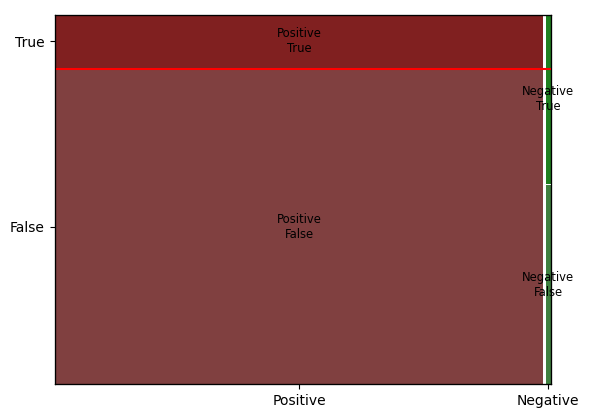

V_O,False,True
S_O,,
Negative,0.541176,0.458824
Positive,0.856583,0.143417


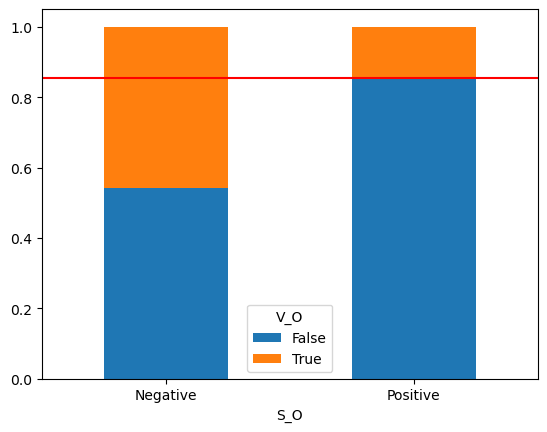

In [15]:
eda2_cc(v_adol_s, 'S_O', 'V_O')

### 스마트폰/인터넷 중독 → 사이버 폭력 연관성

교차표



Q1,1,2,3,4,5,6
V_O,,,,,,
False,649,1866,2043,1287,692,1160
True,80,377,332,211,126,194


Q1,1,2,3,4,5,6
V_O,,,,,,
False,0.890261,0.831922,0.860211,0.859146,0.845966,0.856721
True,0.109739,0.168078,0.139789,0.140854,0.154034,0.143279


----------------------------------------------------------------------------------------------------
카이제곱통계량 17.962555184351498
p-value 0.002993701282837341
자유도 5
기대빈도
 [[ 622.28157924 1914.64688921 2027.32338915 1278.7075524   698.25285572
  1155.78773428]
 [ 106.71842076  328.35311079  347.67661085  219.2924476   119.74714428
   198.21226572]]


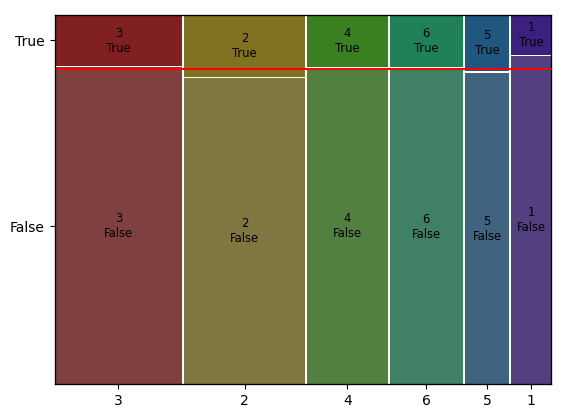

V_O,False,True
Q1,,
1,0.890261,0.109739
2,0.831922,0.168078
3,0.860211,0.139789
4,0.859146,0.140854
5,0.845966,0.154034
6,0.856721,0.143279


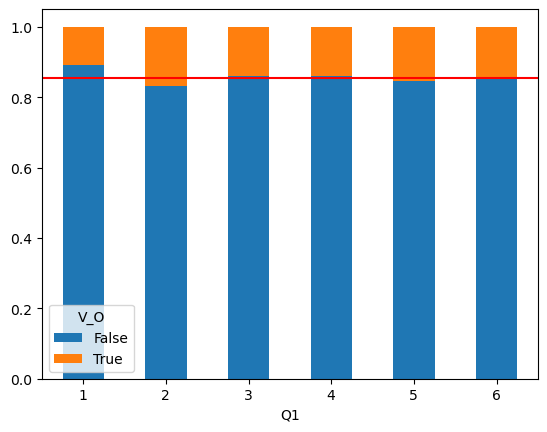

In [16]:
# 인터넷 사용 시간 (숫자 커질 수록 이용 시간 ↑)
eda2_cc(v_adol_s, 'Q1', 'V_O')

교차표



Q15,1,2
V_O,,
False,6959,738
True,1143,177


Q15,1,2
V_O,,
False,0.858924,0.806557
True,0.141076,0.193443


----------------------------------------------------------------------------------------------------
카이제곱통계량 17.625362150232696
p-value 2.689772298691758e-05
자유도 1
기대빈도
 [[6915.94698902  781.05301098]
 [1186.05301098  133.94698902]]


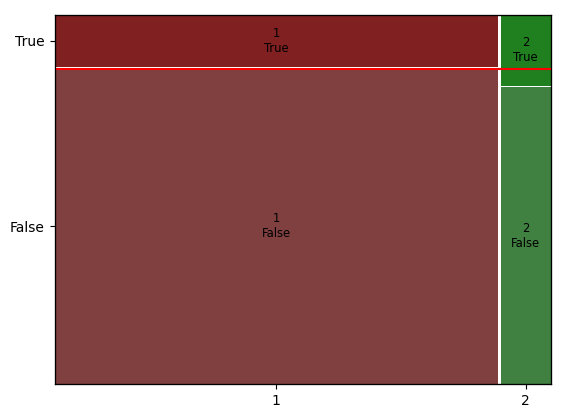

V_O,False,True
Q15,,
1,0.858924,0.141076
2,0.806557,0.193443


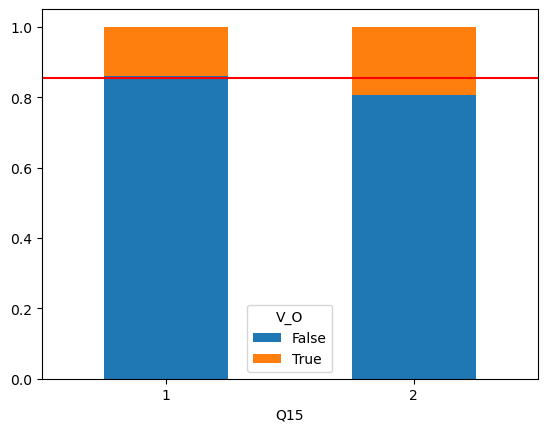

In [17]:
# 사이버 폭력 관련 교육 이수 여부 (1: 있다)
eda2_cc(v_adol_s, 'Q15', 'V_O')

### 기타 분석

##### 괴롭힘 매체 종류
- 1.0: 문자 및 인스턴트 메시지(카카오톡, 라인, 페이스북 메신저 등)
- 2.0: 커뮤니티·동호회 (네이버·다음 카페, 클럽 등)
- 3.0: SNS (페이스북, 인스타그램, 블로그, 틱톡 등)
- 4.0: 개인 홈페이지
- 5.0: 이메일
- 6.0: 온라인 게임
- 7.0: 기타

교차표



sort,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
V_O,,,,,,,,
False,339,18,189,11,3,145,0,10
True,129,42,145,33,27,131,1,13


sort,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
V_O,,,,,,,,
False,0.724359,0.3,0.565868,0.25,0.1,0.525362,0.0,0.434783
True,0.275641,0.7,0.434132,0.75,0.9,0.474638,1.0,0.565217


----------------------------------------------------------------------------------------------------
카이제곱통계량 114.2945235458971
p-value 1.1782804097966455e-21
자유도 7
기대빈도
 [[270.72815534  34.70873786 193.21197411  25.45307443  17.35436893
  159.66019417   0.57847896  13.30501618]
 [197.27184466  25.29126214 140.78802589  18.54692557  12.64563107
  116.33980583   0.42152104   9.69498382]]


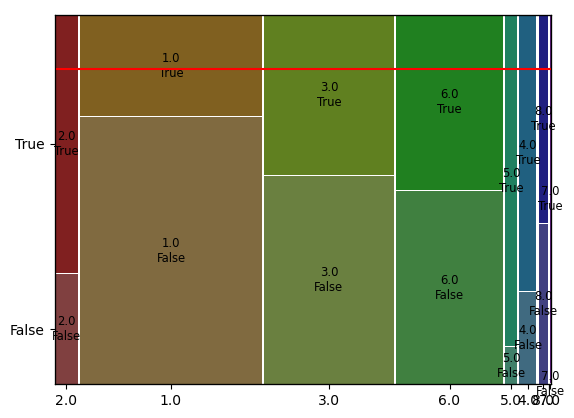

V_O,False,True
sort,,
1.0,0.724359,0.275641
2.0,0.300000,0.700000
3.0,0.565868,0.434132
4.0,0.250000,0.750000
5.0,0.100000,0.900000
6.0,0.525362,0.474638
7.0,0.000000,1.000000
8.0,0.434783,0.565217


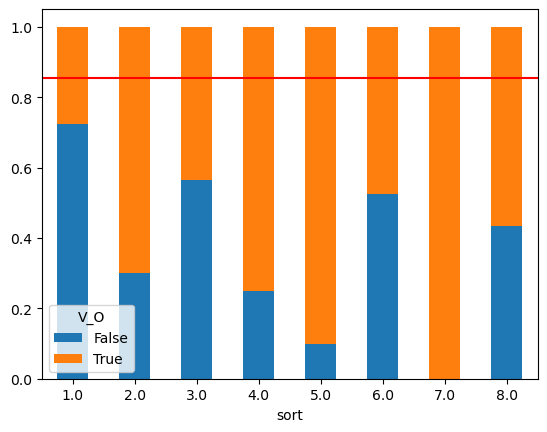

In [18]:
eda2_cc(v_adol_s, 'sort', 'V_O')

<AxesSubplot:>

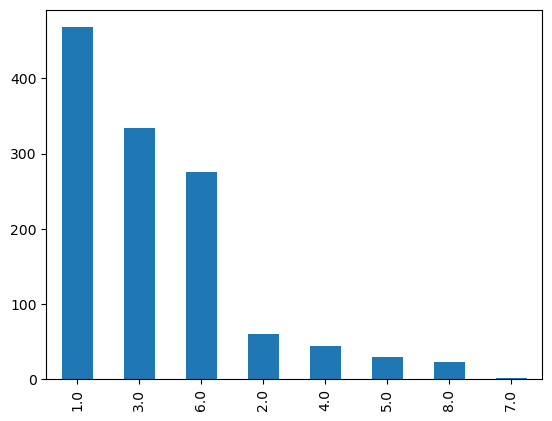

In [19]:
v_adol_s['sort'].value_counts().plot(kind='bar')

##### Q9_1 (괴롭힌 사람이 누구인가?)
- 1: 아는 사람
- 2: 모르는 사람

<AxesSubplot:>

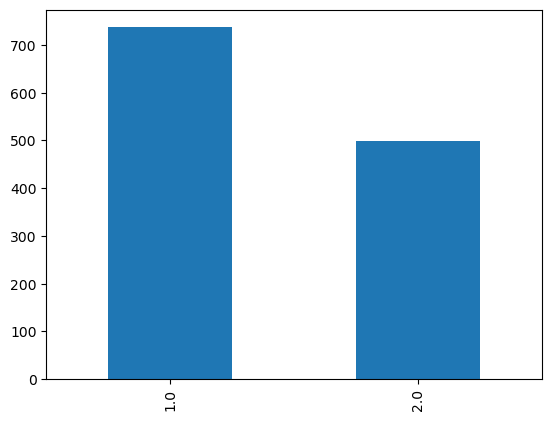

In [20]:
v_adol_s['Q9_1'].value_counts().plot(kind='bar')

교차표



Q9_1,1.0,2.0
V_O,,
False,454,261
True,283,238


Q9_1,1.0,2.0
V_O,,
False,0.616011,0.523046
True,0.383989,0.476954


----------------------------------------------------------------------------------------------------
카이제곱통계량 10.16799275841759
p-value 0.0014289976490148538
자유도 1
기대빈도
 [[426.33899676 288.66100324]
 [310.66100324 210.33899676]]


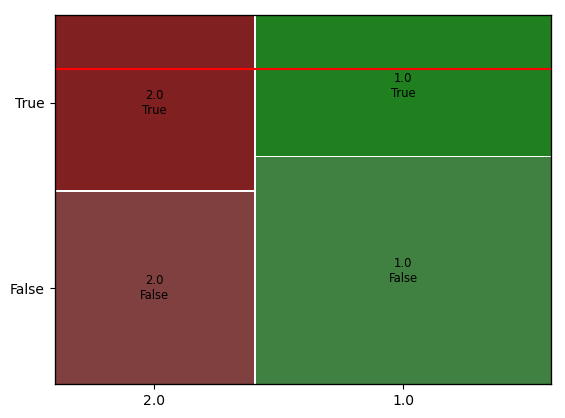

V_O,False,True
Q9_1,,
1.0,0.616011,0.383989
2.0,0.523046,0.476954


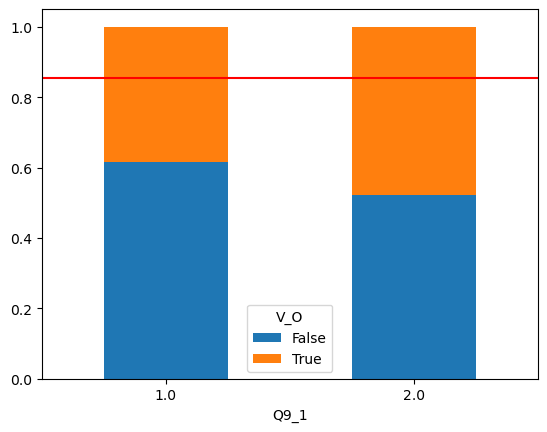

In [21]:
eda2_cc(v_adol_s, 'Q9_1', 'V_O')

##### Q9_2 (누구와 함께 괴롭혔는가?)
- 1.0: 혼자, 2.0: 둘, 3.0: 셋, 4.0: 넷 이상

<AxesSubplot:>

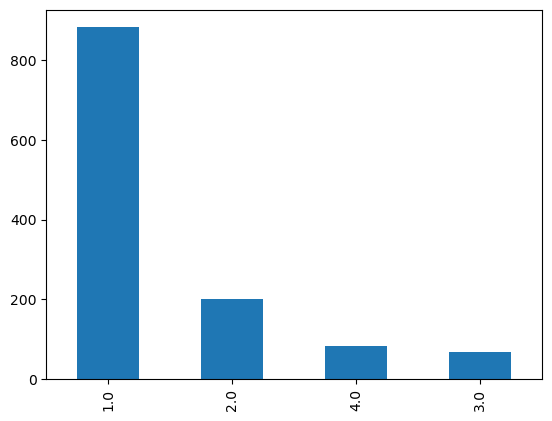

In [22]:
v_adol_s['Q9_2'].value_counts().plot(kind='bar')

교차표



Q9_2,1.0,2.0,3.0,4.0
V_O,,,,
False,548,91,30,46
True,334,110,39,38


Q9_2,1.0,2.0,3.0,4.0
V_O,,,,
False,0.621315,0.452736,0.434783,0.547619
True,0.378685,0.547264,0.565217,0.452381


----------------------------------------------------------------------------------------------------
카이제곱통계량 25.841528518920345
p-value 1.0294531462129893e-05
자유도 3
기대빈도
 [[510.2184466  116.27427184  39.91504854  48.59223301]
 [371.7815534   84.72572816  29.08495146  35.40776699]]


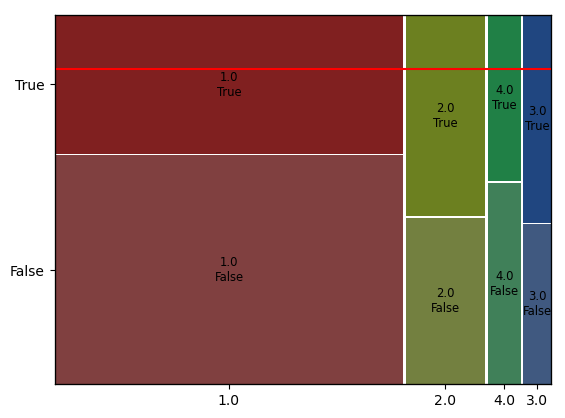

V_O,False,True
Q9_2,,
1.0,0.621315,0.378685
2.0,0.452736,0.547264
3.0,0.434783,0.565217
4.0,0.547619,0.452381


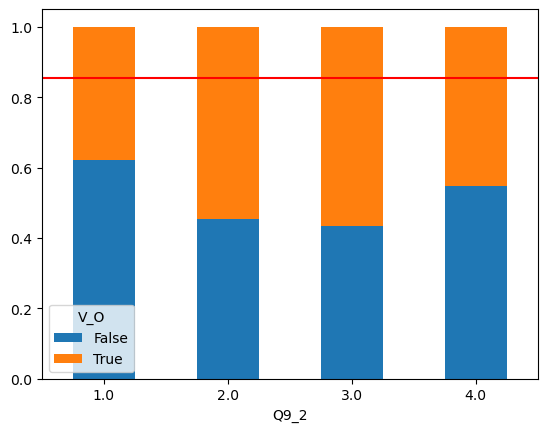

In [23]:
eda2_cc(v_adol_s, 'Q9_2', 'V_O')

##### Q9_4_1 ~ Q9_4_6 (괴롭히는 행동을 한 이유는?)
- 1.0: 재미나 장난으로, 스트레스 해소를 위해
- 2.0: 주변에서 함께 하므로, 친구들과 어울리기 위해 
- 3.0: 상대방이 먼저 그런 행동을 해서, 보복하기 위해 
- 4.0: 상대방이 싫어서, 상대방에게 화가 나서 
- 5.0: 내 의견과 달라서, 상대방이 틀린 말을 해서 
- 6.0: 그냥 특별한 이유 없이

<AxesSubplot:>

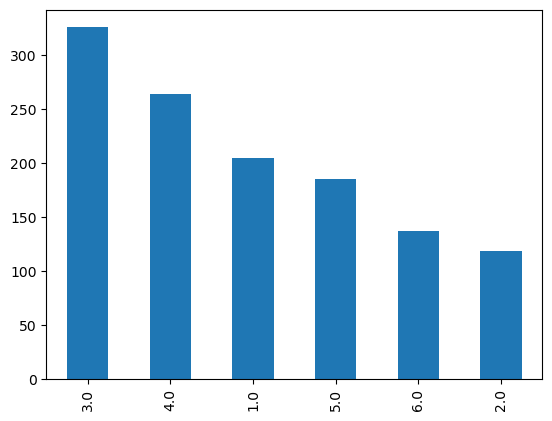

In [24]:
v_adol_s['why'].value_counts().plot(kind='bar')

##### Q9_6_1 ~ Q9_6_5 (괴롭히고 나서 어떤 생각이 들었는가?)
- 1.0: 전혀 그렇지 않다, 2.0: 그렇지 않다, 3.0: 그렇다, 4.0: 매우 그렇다
- 1: 정당한 행동이라 생각했다
- 2: 상대방에게 미안하고 후회스러웠다
- 3: 문제가 생길까봐 걱정되었다
- 4: 흥미롭고 재미있었다
- 5: 아무런 느낌이 없었다

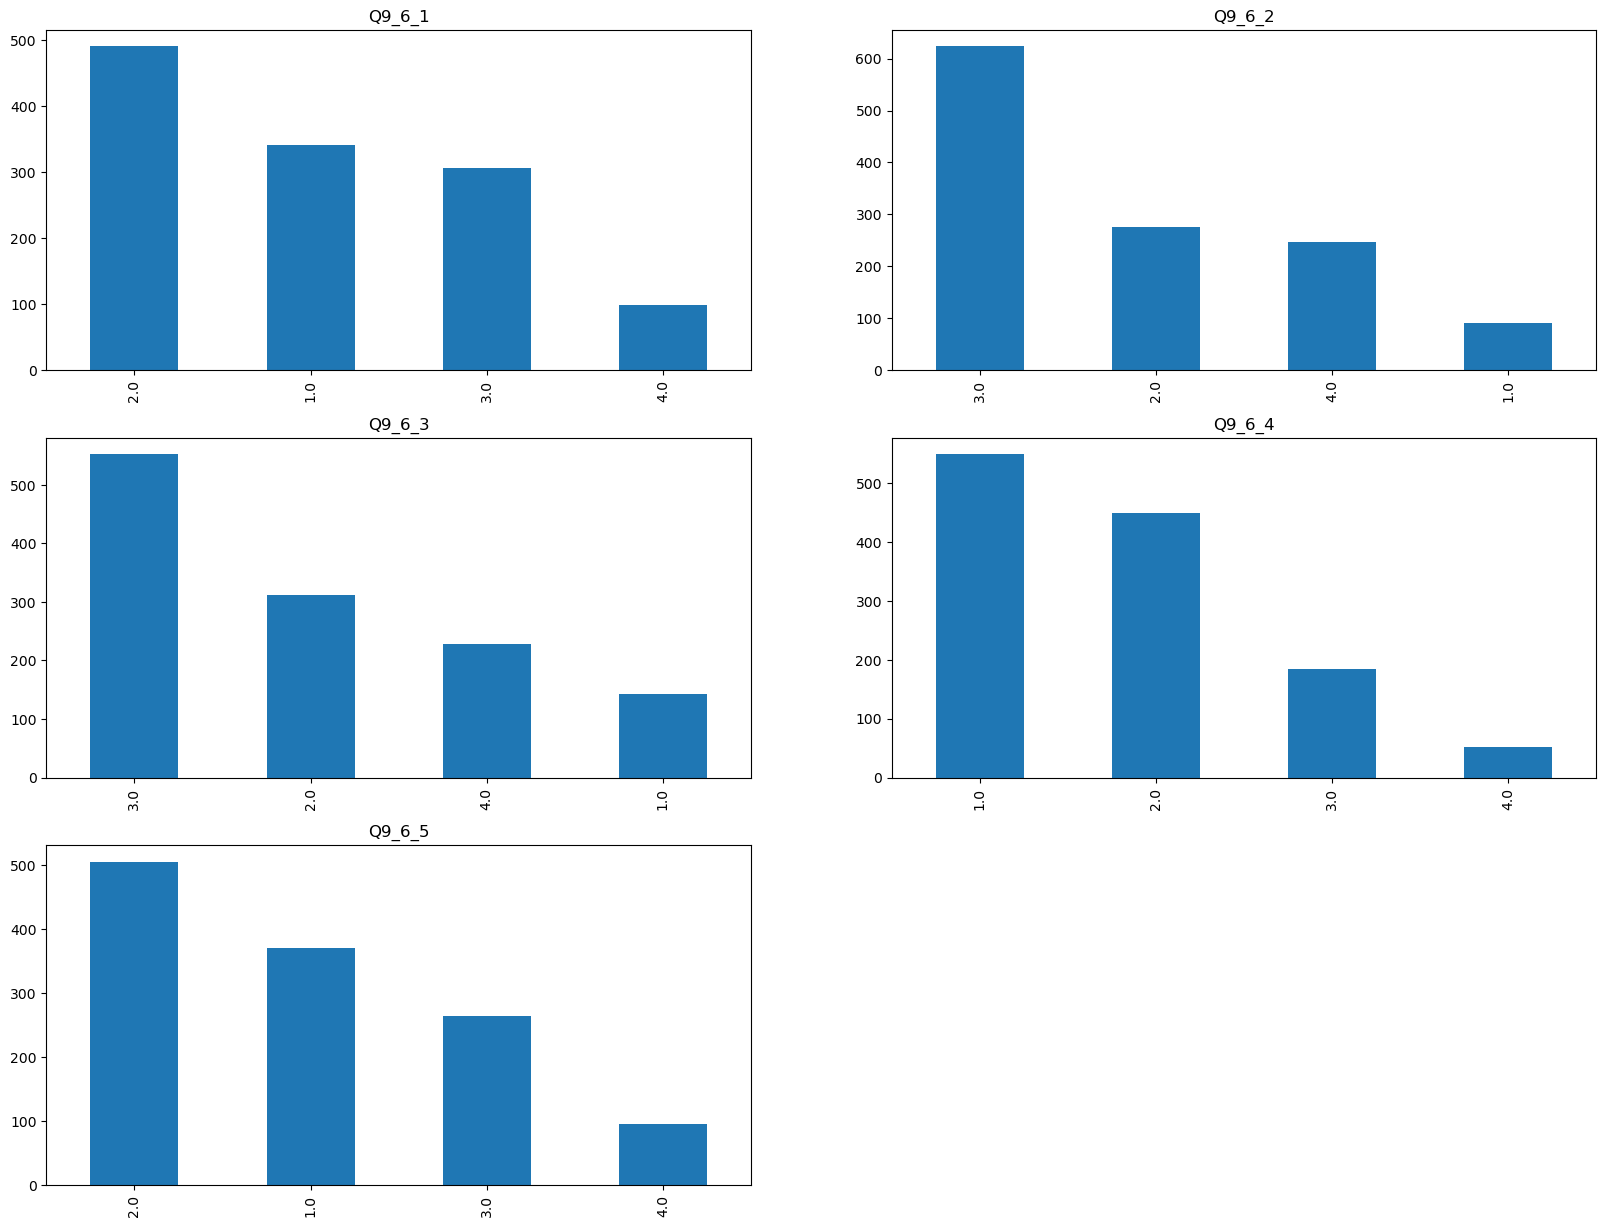

In [25]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 2, 1)
v_adol_s['Q9_6_1'].value_counts().plot(kind='bar', title='Q9_6_1')
plt.subplot(3, 2, 2)
v_adol_s['Q9_6_2'].value_counts().plot(kind='bar', title='Q9_6_2')
plt.subplot(3, 2, 3)
v_adol_s['Q9_6_3'].value_counts().plot(kind='bar', title='Q9_6_3')
plt.subplot(3, 2, 4)
v_adol_s['Q9_6_4'].value_counts().plot(kind='bar', title='Q9_6_4')
plt.subplot(3, 2, 5)
v_adol_s['Q9_6_5'].value_counts().plot(kind='bar', title='Q9_6_5')

plt.show()